In [4]:
import time
import torch
import math
import pandas as pd
from ultralytics import YOLO
from torchvision import models, transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load YOLO model (Ultralytics YOLOv5)
yolo_model = YOLO("yolov5s.pt")  

# Load Faster R-CNN model (Torchvision)
faster_rcnn_model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
faster_rcnn_model.eval()

# Transform function for Faster R-CNN
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to run YOLO inference
def run_yolo_inference(image_path):
    start_time = time.time()
    results = yolo_model(image_path)  # This returns a list of results
    inference_time = time.time() - start_time
    inference_time = round(inference_time, 2)
    # YOLO results are in a list, so we access the first element and extract data
    result = results[0]  # Get the result for the first image
   
    # Extract number of objects detected (boxes are detected objects)
    num_objects = len(result.boxes)  # Number of objects detected
   
    # Extract confidence scores (probabilities)
    probabilities = result.boxes.conf.tolist()  # Confidence for each detection
    probabilities = [round(prob, 2) for prob in probabilities]
    return inference_time, num_objects, probabilities

# Function to run Faster R-CNN inference
def run_fasterrcnn_inference(image_path):
    start_time = time.time()

    # Load image and apply transformation
    image = Image.open(image_path).convert("RGB")
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension

    # Run inference
    with torch.no_grad():
        prediction = faster_rcnn_model(image_tensor)
   
    inference_time = time.time() - start_time
    inference_time = round(inference_time, 2)
    # Extract number of objects detected and probabilities
    num_objects = len(prediction[0]['labels'])  # Number of detected objects
    probabilities = prediction[0]['scores'].tolist()  # List of detection confidences
    probabilities = [round(prob, 2) for prob in probabilities]
    return inference_time, num_objects, probabilities

# Function to process a batch of images
def process_images(image_paths):
    comparison_data = []
   
    for image_path in image_paths:
        # Run YOLO inference
        yolo_time, yolo_objects, yolo_probs = run_yolo_inference(image_path)
       
        # Run Faster R-CNN inference
        fasterrcnn_time, fasterrcnn_objects, fasterrcnn_probs = run_fasterrcnn_inference(image_path)
       
        # Collect the data for each image
        comparison_data.append({
            'Image': image_path,
            'YOLO Time (s)': yolo_time,
            'Faster R-CNN Time (s)': fasterrcnn_time,
            'YOLO Objects Detected': yolo_objects,
            'Faster R-CNN Objects Detected': fasterrcnn_objects,
            'YOLO Probabilities': yolo_probs,
            'Faster R-CNN Probabilities': fasterrcnn_probs
        })
   
    # Convert the collected data into a pandas DataFrame
    df = pd.DataFrame(comparison_data)
   
    return df

# image path
image_paths = ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg",
               "image6.jpg", "image7.jpg", "image8.jpg", "image9.jpg", "image10.jpg"]

# Process images and get the comparison data
df_comparison = process_images(image_paths)

# Display the comparison data in tabular format
# Save the data to a CSV file, to prepare the table
df_comparison.to_csv('yolo_vs_fasterrcnn_comparison.csv', index=False)
df_comparison

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████████████████████████████████| 17.7M/17.7M [00:03<00:00, 5.89MB/s]
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)



image 1/1 /Users/akanksharai/image1.jpg: 640x640 1 person, 262.5ms
Speed: 45.7ms preprocess, 262.5ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/akanksharai/image2.jpg: 640x640 1 person, 1 car, 133.3ms
Speed: 2.3ms preprocess, 133.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/akanksharai/image3.jpg: 640x640 1 horse, 142.9ms
Speed: 2.2ms preprocess, 142.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/akanksharai/image4.jpg: 640x640 3 persons, 168.5ms
Speed: 1.7ms preprocess, 168.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/akanksharai/image5.jpg: 640x640 2 cups, 2 bowls, 8 oranges, 119.0ms
Speed: 1.7ms preprocess, 119.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /Users/akanksharai/image6.jpg: 640x640 7 persons, 1 dog, 1 sports ball, 129.6ms
Speed: 1.7ms preprocess, 129.6ms inference, 1.0ms pos

Image  YOLO Time (s)  Faster R-CNN Time (s)  YOLO Objects Detected  \
0   image1.jpg           0.63                   2.14                      1   
1   image2.jpg           0.14                   1.63                      2   
2   image3.jpg           0.16                   0.96                      1   
3   image4.jpg           0.18                   0.95                      3   
4   image5.jpg           0.13                   1.03                     12   
5   image6.jpg           0.14                   0.94                      9   
6   image7.jpg           0.13                   0.89                      4   
7   image8.jpg           0.13                   0.89                      0   
8   image9.jpg           0.13                   0.87                      2   
9  image10.jpg           0.13                   0.90                      1   

   Faster R-CNN Objects Detected  \
0                              4   
1                             39   
2                              5   
3                             25   
4                             20   
5                             31   
6                             72   
7                              4   
8                              8   
9                             15   

                                  YOLO Probabilities  \
0                                             [0.29]   
1                                        [0.86, 0.3]   
2                                             [0.38]   
3                                 [0.73, 0.68, 0.63]   
4  [0.88, 0.69, 0.67, 0.57, 0.56, 0.56, 0.49, 0.4...   
5  [0.82, 0.77, 0.57, 0.53, 0.49, 0.41, 0.37, 0.3...   
6                           [0.44, 0.36, 0.35, 0.33]   
7                                                 []   
8                                       [0.25, 0.25]   
9                                             [0.41]   

                          Faster R-CNN Probabilities  
0                           [0.37, 0.27, 0.08, 0.05]  
1  [1.0, 0.8, 0.74, 0.73, 0.59, 0.57, 0.52, 0.49,...  
2                     [0.83, 0.52, 0.14, 0.12, 0.11]  
3  [0.99, 0.97, 0.95, 0.49, 0.28, 0.24, 0.16, 0.1...  
4  [1.0, 0.72, 0.69, 0.64, 0.48, 0.26, 0.24, 0.18...  
5  [1.0, 0.99, 0.98, 0.98, 0.74, 0.64, 0.58, 0.53...  
6  [0.79, 0.78, 0.74, 0.72, 0.66, 0.62, 0.49, 0.4...  
7                           [0.12, 0.09, 0.09, 0.06]  
8    [0.24, 0.17, 0.12, 0.1, 0.08, 0.06, 0.06, 0.05]  
9  [0.88, 0.7, 0.26, 0.26, 0.22, 0.11, 0.09, 0.09...

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


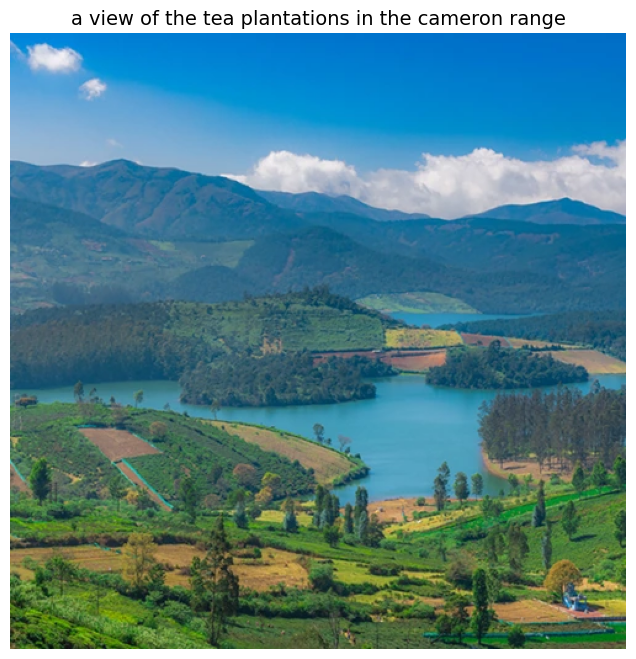

In [26]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image1.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


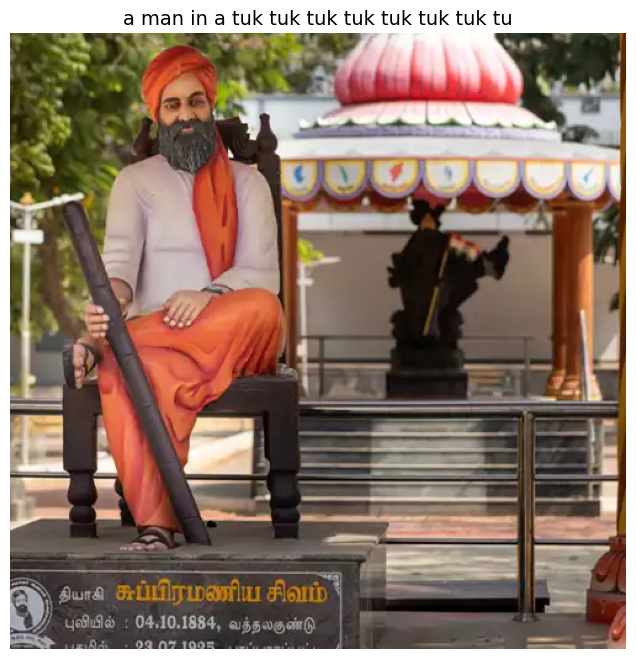

In [8]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image2.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


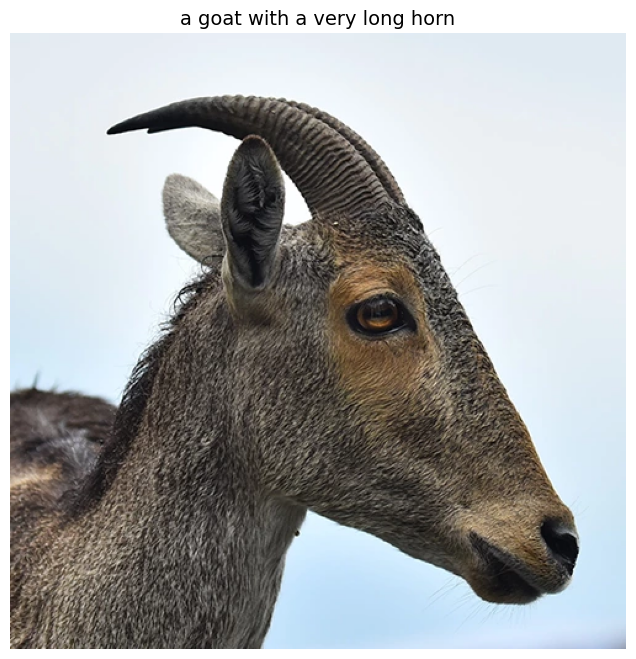

In [10]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image3.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


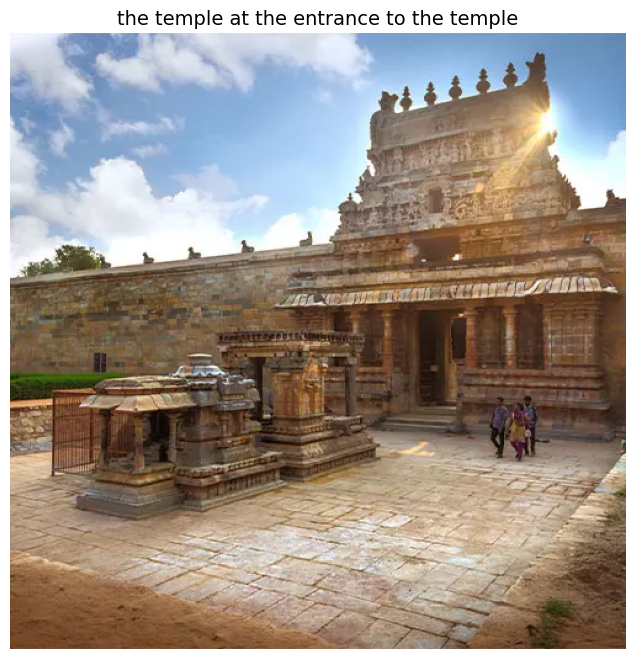

In [12]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image4.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


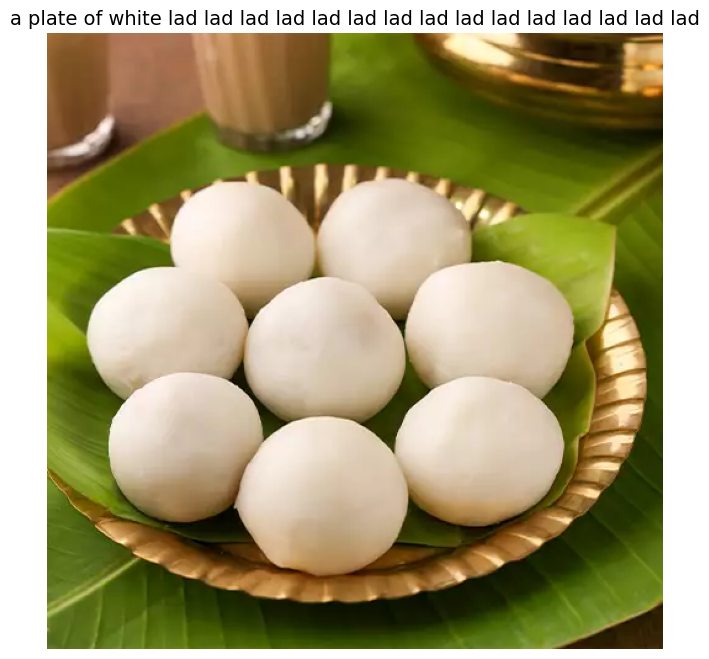

In [14]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

#image path
image_path = "image5.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


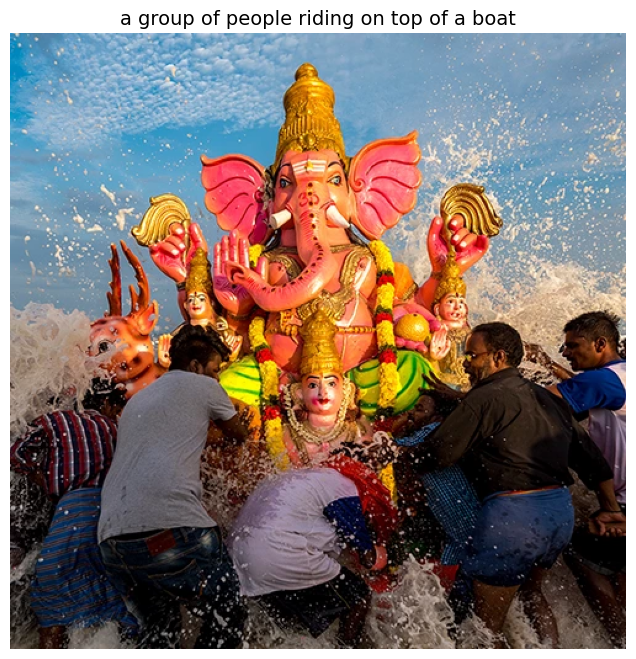

In [16]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image6.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


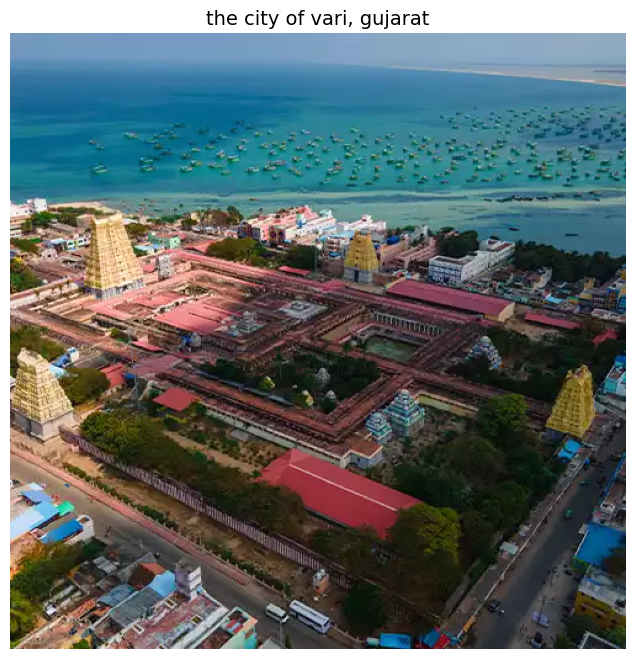

In [18]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image7.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


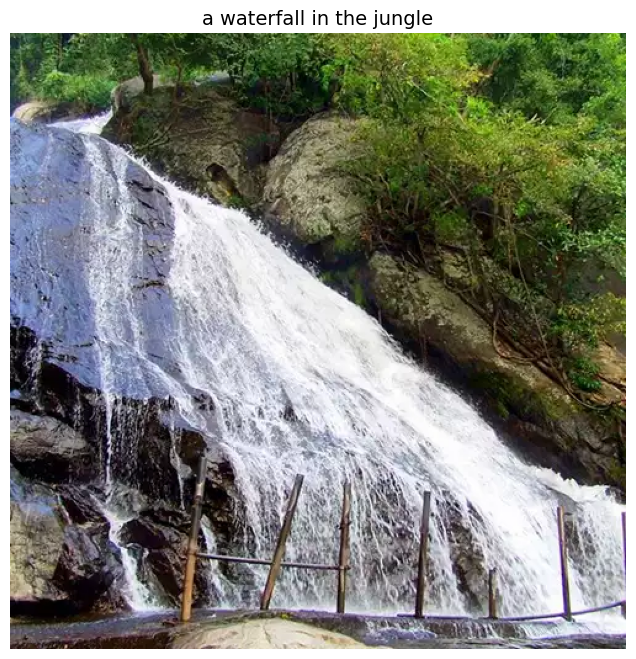

In [20]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image8.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


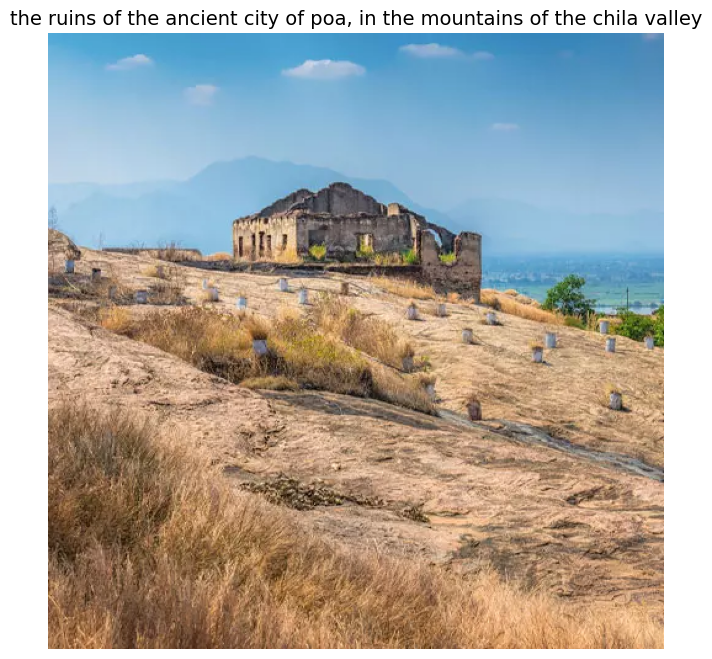

In [22]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image9.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


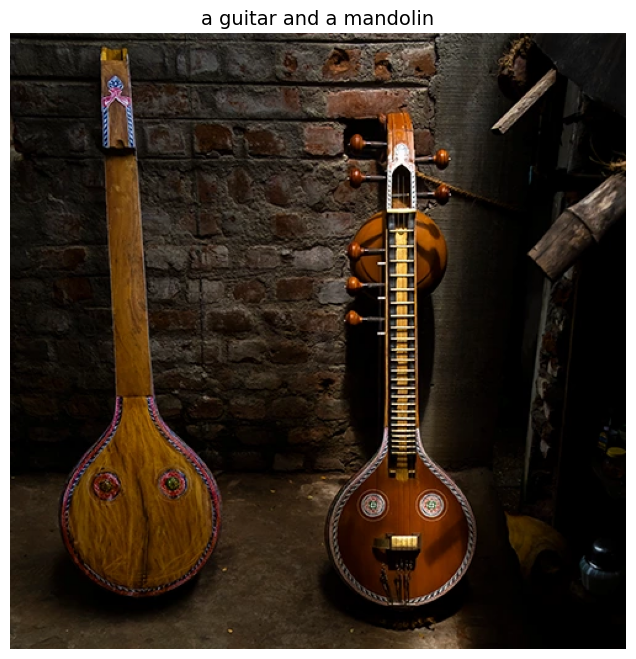

In [24]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained BLIP model and processor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

# Function to generate caption for an image
def generate_caption(image_path):
    # Open the image
    image = Image.open(image_path).convert("RGB")

    # Preprocess the image and prepare the input for the model
    inputs = processor(image, return_tensors="pt")

    # Generate the caption using the BLIP model
    out = model.generate(**inputs)
   
    # Decode the generated caption
    caption = processor.decode(out[0], skip_special_tokens=True)

    return image, caption

# image path
image_path = "image10.jpg"

# Generate caption and image
image, caption = generate_caption(image_path)

# Display image and caption
plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')  # Hide axes for better display
plt.title(caption, fontsize=14)  # Set the caption as title
plt.show()